In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040425.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  1.221896  1.225806  1.228739  1.230694  1.230694  1.229717  1.225806   

          7         8         9  ...      4192      4193      4194      4195  \
0  1.220919  1.214076  1.208211  ...  1.297165  1.293255  1.286413  1.277615   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  1.272727  1.277615  1.301075  1.338221    130.857983      62.914338  

[1 rows x 4202 columns]
[130.85798319]  /  [62.91433824]
          0         1         2         3         4         5         6  \
0  1.221896  1.225806  1.228739  1.230694  1.230694  1.229717  1.225806   

          7         8         9  ...      4190      4191      4192      4193  \
0  1.220919  1.214076  1.208211  ...  1.298143  1.298143  1.297165  1.293255   

       4194      4195      4196      4197      4198      4199  
0  1.286413  1.277615  1.272727  1.277615  1.301075  1.338221  

[1 rows x 4200 columns]


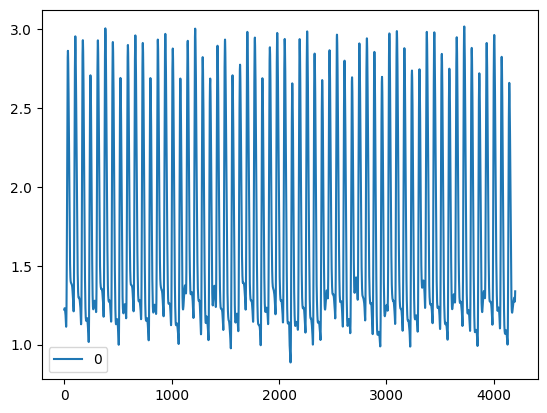

In [369]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [373]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

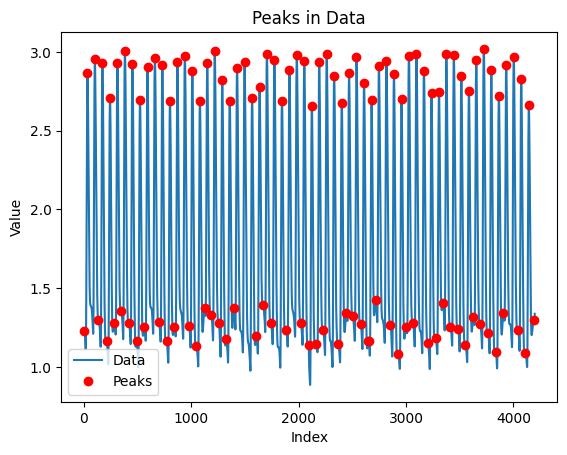

{'indices': array([   3,   34,  103,  136,  173,  212,  244,  284,  313,  347,  383,
        422,  452,  491,  523,  563,  593,  662,  699,  731,  771,  802,
        842,  871,  941,  977, 1010, 1048, 1081, 1125, 1149, 1186, 1219,
       1257, 1289, 1326, 1359, 1398, 1427, 1497, 1567, 1607, 1637, 1669,
       1705, 1743, 1775, 1845, 1884, 1915, 1983, 2020, 2053, 2093, 2123,
       2162, 2192, 2227, 2262, 2331, 2369, 2402, 2445, 2470, 2505, 2539,
       2578, 2610, 2650, 2653, 2680, 2717, 2748, 2818, 2855, 2888, 2929,
       2959, 3003, 3027, 3065, 3097, 3167, 3202, 3238, 3278, 3307, 3344,
       3376, 3414, 3446, 3485, 3516, 3554, 3586, 3628, 3655, 3691, 3725,
       3764, 3794, 3834, 3865, 3908, 3934, 4004, 4043, 4073, 4113, 4144,
       4190]), 'values': array([1.23069404, 2.86412512, 2.95601173, 1.29912023, 2.9315738 ,
       1.16813294, 2.7086999 , 1.27859238, 2.93059629, 1.35483871,
       3.00684262, 1.28054741, 2.9198436 , 1.16226784, 2.69208211,
       1.25610948, 2.90127077, 2

In [374]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [375]:
def split_values_high_low(filtered_df, threshold=2.5):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(peak_values_df)
print(high_values)
print(low_values)


[None, 2.8641251221896384, 2.956011730205278, None, 2.9315738025415445, None, 2.708699902248289, None, 2.930596285434995, None, 3.006842619745845, None, 2.919843597262952, None, 2.69208211143695, None, 2.9012707722385143, 2.961876832844575, None, 2.913978494623656, None, 2.6911045943304006, None, 2.935483870967742, 2.9716520039100685, None, 2.878787878787879, None, 2.6881720430107525, None, 2.927663734115347, None, 3.004887585532747, None, 2.8240469208211145, None, 2.6881720430107525, None, 2.8963831867057674, 2.935483870967742, 2.708699902248289, None, 2.776148582600196, None, 2.98435972629521, None, 2.948191593352884, 2.6901270772238512, None, 2.886608015640274, 2.9775171065493646, None, 2.9393939393939394, None, 2.6578690127077222, None, 2.93841642228739, None, 2.9872922776148583, 2.84652981427175, None, 2.678396871945259, None, 2.868035190615836, None, 2.9667644183773216, None, 2.801564027370479, None, None, 2.6959921798631474, None, 2.911045943304008, 2.943304007820137, None, 2.85

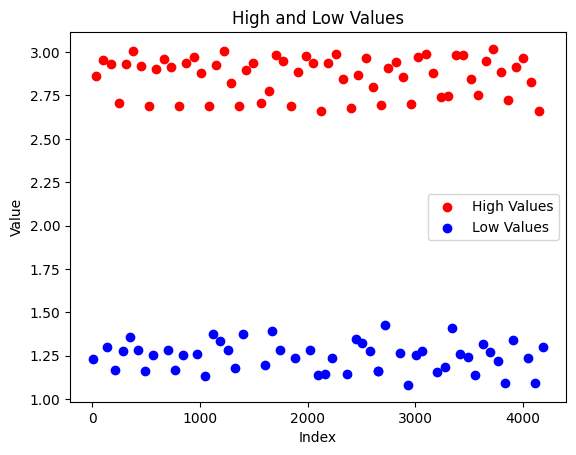

In [376]:
# Plot high values
plt.scatter(peak_values_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(peak_values_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [377]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 2.863685239491691
Average Low Value: 1.246065972821191


In [380]:
# Scale down to 0-1
def scale_down(a, min_val_orig=0, max_val_orig=3.5, min_val_scale=0, max_val_scale=1):

    scaled_value = min_val_scale + (a - min_val_orig) * (max_val_scale - min_val_scale) / (max_val_orig - min_val_orig)
    return scaled_value

In [381]:
scaled_average_high = scale_down(average_high)
scaled_average_low = scale_down(average_low)
print("Scaled value of", average_high, ":", scaled_average_high)
print("Scaled value of", average_low, ":", scaled_average_low)

Scaled value of 2.863685239491691 : 0.8181957827119117
Scaled value of 1.246065972821191 : 0.3560188493774831
